In [1]:
import torch
import numpy as np
import sys
import os

sys.path.append(os.getcwd()+'/../src/')
%load_ext autoreload
%autoreload 2

from attribute import *
from plot import *
from ppo_policy import *
from utils import *

In [2]:
BASE_MODEL = '../../models/pca/'

In [3]:
from stable_baselines3 import PPO
model = PPO.load(os.path.join(BASE_MODEL, 'PCA_MlpPolicy_model'))
# X = np.load(f'{BASE_PATH}/ppo/MlpPolicy/observations.npy')
X = np.load(os.path.join(BASE_MODEL, 'PCA_MlpPolicy_observations.npy'))
X = torch.Tensor(X)

In [4]:
predictions = []
for _ in X:
    predictions.append(model.predict(X[0])[0][0])
predictions = np.array(predictions)

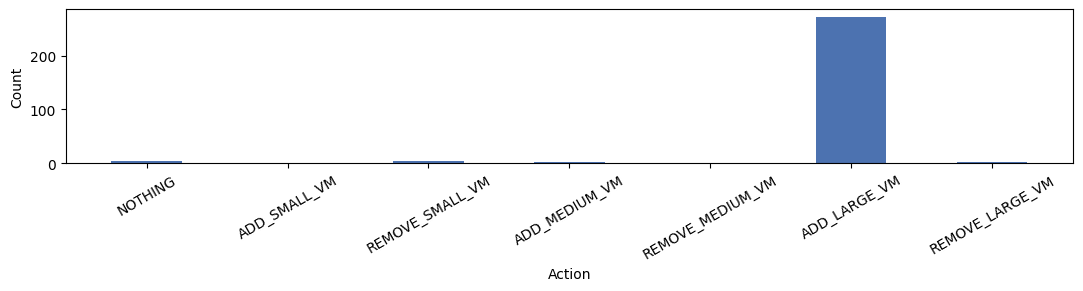

In [5]:
plot_action_histogram(predictions)

In [6]:
from ppo_policy import PPOPolicy
ppo_net = PPOPolicy(model.observation_space, model.action_space, model.lr_schedule, model)

In [7]:
N = 500
idxs = np.random.choice(np.arange(X.shape[0]), size=N)
X_sample = X[idxs]
predictions_sample = predictions[idxs]

# X_sample = X[N+40:2*(N+40)]
# predictions_sample = predictions[N+40:2*(N+40)]

ig_attributor = IGAttributor(net=ppo_net,
                            policy='mlp',
                            agent='ppo',
                            data=X_sample,
                            predictions=predictions_sample) 

In [8]:
mean_attributions_per_action = ig_attributor.get_mean_attributions()

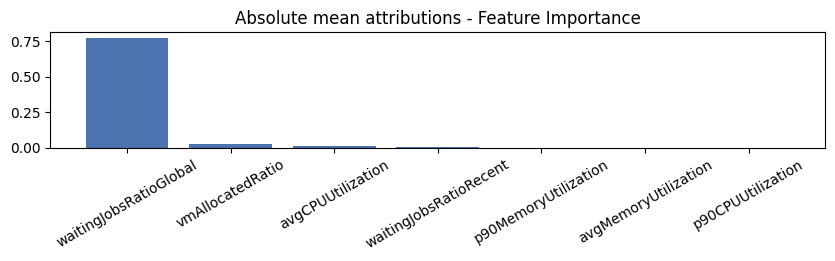

In [9]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0], abs=True)

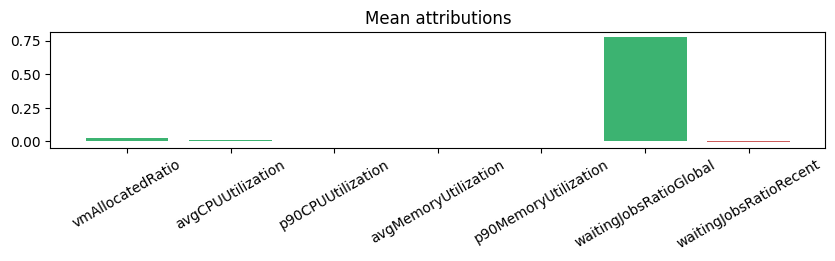

In [10]:
plot_mean_attributions(mean_attributions=mean_attributions_per_action[0])